# ZMYM3
[X-linked intellectual developmental disorder-112 (XLID112)](https://omim.org/entry/301111) is caused by hemizygous or heterozygous mutation in the ZMYM3 gene.

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.6.dev0


### ZMYM3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ZMYM3.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'ZMYM3'
mane_tx_id = 'NM_201599.3'
mane_protein_id = 'NP_963893.1' # zinc finger MYM-type protein 3 isoform 1 
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
print(f'Loaded {len(phenopackets)} phenopackets')

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Loaded 33 phenopackets
Individuals Processed: 100%|██████████| 33/33 [00:00<00:00, 44.90 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #9
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)
     ·ontology_class of the time_of_death field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
29,Delayed speech and language development
21,Motor delay
20,Intellectual disability
15,Autistic behavior
8,Hypospadias
8,Cupped ear
7,Short stature
6,Sleep abnormality
6,Deeply set eye
6,Microcephaly


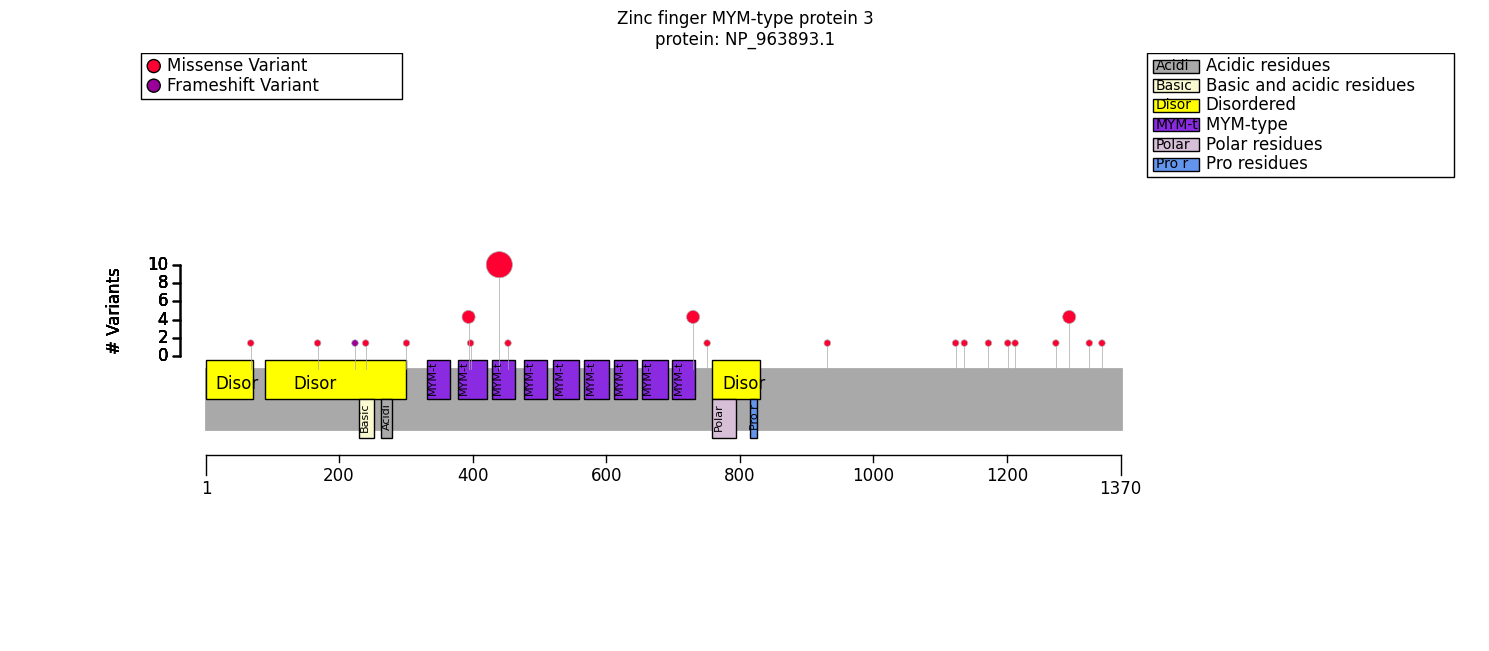

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

zmym3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
zmym3_fig.tight_layout()

# Genotype-Phenotype Correlation (GPC) Analysis

In [6]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [7]:
from gpsea.model.genome import Region
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import protein_region
from gpsea.analysis.clf import monoallelic_classifier

n_term = protein_region(region=Region(1, 600), tx_id=mane_tx_id)
nterm_clf = monoallelic_classifier(
    a_predicate=n_term,
    b_predicate=~n_term,
    a_label="N term",
    b_label="other"
)
nterm_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=nterm_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(nterm_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,6
"Skipping ""general"" level terms",83
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),151


In [8]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=nterm_result)

Allele group,N term,other,Corrected p values,p values
Hypospadias [HP:0000047],8/19 (42%),0/13 (0%),0.624472,0.010408
Cupped ear [HP:0000378],7/19 (37%),1/14 (7%),1.000000,0.098151
Abnormal aortic valve cusp morphology [HP:0031567],4/16 (25%),0/14 (0%),1.000000,0.102937
Bicuspid aortic valve [HP:0001647],4/18 (22%),0/14 (0%),1.000000,0.112931
Short stature [HP:0004322],5/13 (38%),2/14 (14%),1.000000,0.208696
Long face [HP:0000276],0/16 (0%),2/14 (14%),1.000000,0.209195
High anterior hairline [HP:0009890],0/16 (0%),2/14 (14%),1.000000,0.209195
Low-set ears [HP:0000369],1/16 (6%),3/14 (21%),1.000000,0.315453
Large joint hypermobilty [HP:0430047],1/7 (14%),0/13 (0%),1.000000,0.350000
Motor delay [HP:0001270],13/16 (81%),8/13 (62%),1.000000,0.405764


In [9]:
from gpsea.analysis.predicate import variant_key

r441w = variant_key("X_71249610_71249610_G_A") #c.1321C>T	p.Arg441Trp
r441q = variant_key("X_71249609_71249609_C_T") #c.1322G>A	p.Arg441Gln	
r441 = r441w | r441q

r441_clf = monoallelic_classifier(
    a_predicate=r441,
    b_predicate=~r441,
    a_label="R441",
    b_label="other"
)
r441_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=r441_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=r441_result)

Allele group,R441,other,Corrected p values,p values
Cupped ear [HP:0000378],7/10 (70%),1/23 (4%),0.012122,0.000202
Abnormal aortic valve cusp morphology [HP:0031567],4/8 (50%),0/22 (0%),0.076628,0.002554
Hypospadias [HP:0000047],6/10 (60%),2/22 (9%),0.087597,0.004867
Bicuspid aortic valve [HP:0001647],4/10 (40%),0/22 (0%),0.087597,0.005840
Enuresis [HP:0000805],3/6 (50%),1/22 (5%),0.266667,0.022222
Short stature [HP:0004322],3/4 (75%),4/23 (17%),0.362069,0.041880
Enuresis nocturna [HP:0010677],2/6 (33%),0/21 (0%),0.362069,0.042735
Triangular face [HP:0000325],2/7 (29%),0/23 (0%),0.362069,0.048276
Ambiguous genitalia [HP:0000062],1/4 (25%),0/22 (0%),0.923077,0.153846
Renal cyst [HP:0000107],1/4 (25%),0/22 (0%),0.923077,0.153846


# Summary

In [10]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_mono(
        result=nterm_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=r441_result,
    ),
)

caption = ""
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [11]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

In [12]:
summarizer.process_latex(report=report, protein_fig=zmym3_fig)

Figure saved to ../../supplement/img/ZMYM3_protein_diagram-draft.pdf
Output to ../../supplement/tex/ZMYM3_summary_draft.tex
